1. Write a code in your favorite language to simulate the evolution of the Ising model in 2D, in a square grid, using Metropolis Monte Carlo. Assume J=1, k_B=1. Code has to be able to run for periodic or free BC in any direction $x/y$. Assume no magnetic field. Start with random spin distributions, for equal number of spin up and spin down sites. Code has to provide average energy and magnetization of the system, $<E>$ and $<M>$. Code text has to be attached at the end of the document with your results.

In [1]:
from ising import *

2. For the infinite square grid, the critical temperature is $T=2.269$ in our units. Run a $32x32$ grid, using PBC in $xy$, and use both $T=1$ and $T=4$. Calculate average energy and average magnetization versus step.
     
   1. How many MC steps are required to reach a steady state at each temperature?
   
   2. Obtain magnetization versus temperature, running for 20 different temperatures, going across the phase transition. Is it better to use regularly spaced temperature values? Can you estimate the critical temperature for your system?

In [5]:
N = 32

In [3]:
Ising1 = Ising(N)
Ising4 = Ising(N)

In [4]:
expe_T1 = Ising_Experiment(Ising1,1,Nsteps=5000,data_step=50)
expe_T4 = Ising_Experiment(Ising4,4,Nsteps=10000,data_step=100)

In [2]:
plt.rc('font',family='FreeSerif')

In [13]:
ticks1 = [50*i for i in range(len(expe_T1[0]))]
ticks4 = [100*i for i in range(len(expe_T4[0]))]

NameError: name 'expe_T1' is not defined

In [3]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches((16,10))

fig.suptitle("Energía y magnetización en PBC, dos temperaturas",size=20)

axs[0][0].plot(ticks1,expe_T1[0],label="$T=1$",color='darkslategrey')
axs[0][0].set_title("Energía promedio por spin",size=16)
axs[0][0].set_ylabel("Energía [u. reducidas]",size=16)
axs[1][0].plot(ticks4,expe_T4[0],label="$T=4$",color='darkslategrey')
axs[1][0].set_ylabel("Energía [u. reducidas]",size=16)

axs[0][1].plot(ticks1,expe_T1[1],label="$T=1$",color='darkred')
axs[0][1].set_ylabel("Magnetizacion [u. reducidas]",size=16)
axs[0][1].set_title("Magnetización promedio por spin",size=16)
axs[1][1].plot(ticks4,expe_T4[1],label="$T=4$",color='darkred')
axs[1][1].set_ylabel("Magnetizacion [u. reducidas]",size=16)

for ax in axs:
    for plot in ax:
        plot.grid()
        plot.legend(fontsize=15)
        plot.tick_params(axis='both',which='both',direction='in', labelsize=14)
        plot.set_xlabel("Nro de steps",size=16)

fig.tight_layout()
plt.savefig("plots/2T_PBC.png")

NameError: name 'expe_T1' is not defined

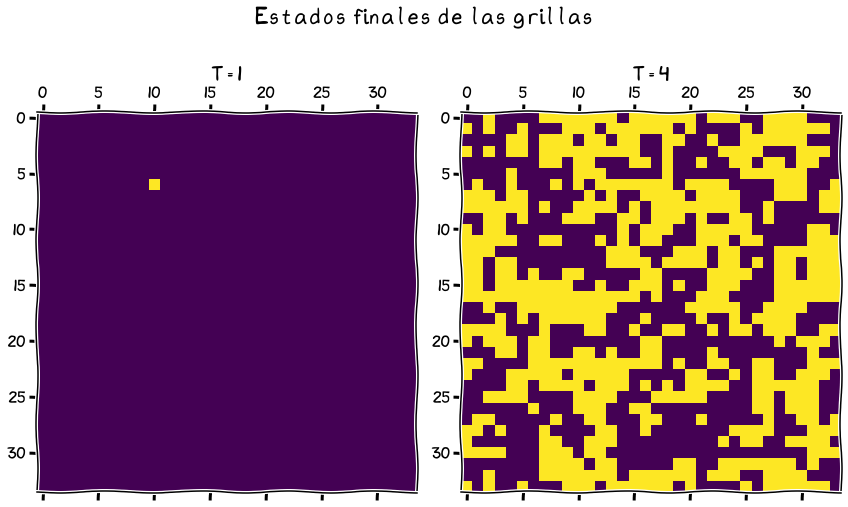

In [7]:
with plt.xkcd():
    fig,axs=plt.subplots(1,2)
    fig.set_size_inches((12,8))
    fig.suptitle("Estados finales de las grillas",size=22)
    axs[0].matshow(Ising1.grid)
    axs[0].set_title("T = 1",size=18)
    
    axs[1].matshow(Ising4.grid)
    axs[1].set_title("T = 4",size=18)
    fig.tight_layout()
    plt.savefig("plots/2T_PBC_grids.png")

Para decidir acerca del equiespaciado, vamos a hacer una corrida por debajo del punto crítico para 3 temperaturas, y otras 3 para temperaturas por arriba del punto crítico. 

In [6]:
Isings_lowT = [Ising(N),Ising(N),Ising(N)]
Isings_highT = [Ising(N),Ising(N),Ising(N)]
Ising_Critical = Ising(N)

In [7]:
T_low = [0.68,1.361,2.04] # 0.3,0.6 y 0.9 * T_critica
T_high = [2.72,1.5,4.08] # 1.2,1.5 y 1.8 * T_critica
T_critica = 2.269

In [ ]:
# Corremos!
experim_low = []
experim_high = []
for i in range(len(T_low)):
    experim_low.append(Ising_Experiment(Isings_lowT[i],T_low[i]))
    experim_high.append(Ising_Experiment(Isings_highT[i],T_high[i]))
experim_critical = Ising_Experiment(Ising_Critical,T_critica)

In [8]:
# Mandar notificación al celu cuando estén los resultados
from notify_run import Notify
notify = Notify()
notify.send('Terminó!')

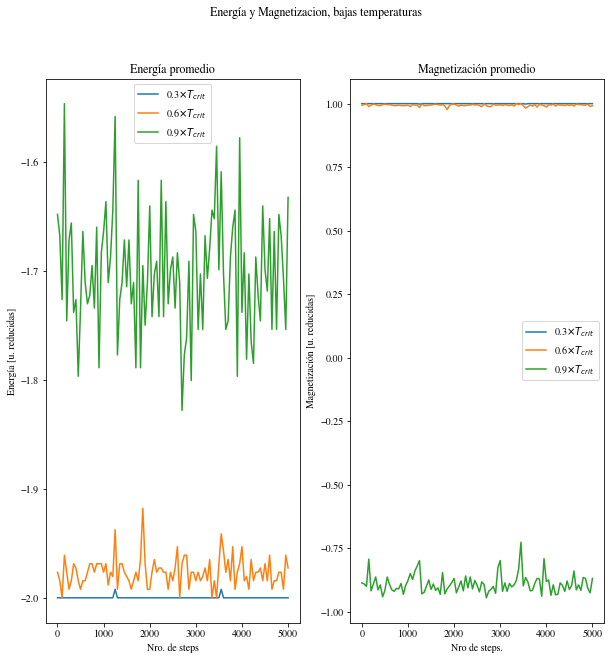

In [46]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches((10,10))
fig.suptitle("Energía y Magnetizacion, bajas temperaturas")
    
for i in range(len(T_low)):
    axs[0].plot(ticks1,experim_low[i][0],label=str(round(0.3*(i+1),2))+"$\\times T_{crit}$")
    axs[1].plot(ticks1,experim_low[i][1],label=str(round(0.3*(i+1),2))+"$\\times T_{crit}$")
axs[0].legend()
axs[0].set_title("Energía promedio")
axs[0].set_ylabel("Energía [u. reducidas]")
axs[0].set_xlabel("Nro. de steps")
axs[1].legend()
axs[1].set_title("Magnetización promedio")
axs[1].set_ylabel("Magnetización [u. reducidas]")
axs[1].set_xlabel("Nro de steps.")
plt.savefig("plots/3Tbajas_PBC.png")
plt.show()

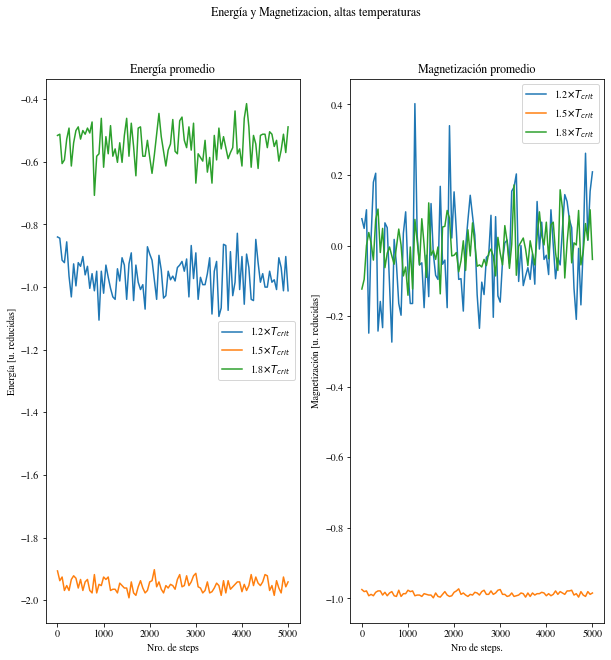

In [47]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches((10,10))
fig.suptitle("Energía y Magnetizacion, altas temperaturas")
    
for i in range(len(T_high)):
    axs[0].plot(ticks1,experim_high[i][0],label=str(round(0.3*(i+4),2))+"$\\times T_{crit}$")
    axs[1].plot(ticks1,experim_high[i][1],label=str(round(0.3*(i+4),2))+"$\\times T_{crit}$")
axs[0].legend()
axs[0].set_title("Energía promedio")
axs[0].set_ylabel("Energía [u. reducidas]")
axs[0].set_xlabel("Nro. de steps")
axs[1].legend()
axs[1].set_title("Magnetización promedio")
axs[1].set_ylabel("Magnetización [u. reducidas]")
axs[1].set_xlabel("Nro de steps.")
plt.savefig("plots/3Taltas_PBC.png")
plt.show()

Las gráficas indican un comportamiento muy sensible ante la variación de temperaturas, y sugieren que el barrido uniforme de temperaturas quizá no sea la mejor forma de realizar el análisis. 

El comportamiento es "ruidoso" cerca de la temperatura crítica, por lo que sugiero de acuerdo con estos resultados que lo mejor es hacer la mayor parte del análisis a distancias prudentes de este valor. 

Lo que se me ocurrió es tomar regiones de temperatura para estudiar el comportamiento del sistema en diferentes intervalos, para obtener alguna intuición sobre su comportamiento global. 

In [75]:
Temps = [0.15,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.269, 
          2.5,2.75,3,3.25,3.5,3.75,4,4.5,5]

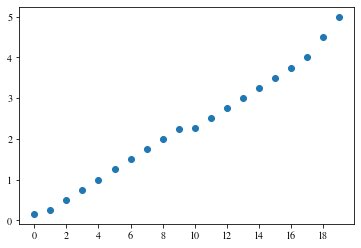

In [76]:
plt.plot(Temps,'o')
plt.xticks([0,2,4,6,8,10,12,14,16,18])
plt.show()

In [78]:
# La gran simulación: (aprox. para 20 minutos en mi máquina)
rata_de_laboratorio = Ising(N)
Runs = []

for T in Temps:
    Runs.append(Ising_Experiment(rata_de_laboratorio,T))
    print("Ya hicimos run en",T)
    rata_de_laboratorio.restart()

Ya hicimos run en 0.15
Ya hicimos run en 0.25
Ya hicimos run en 0.5
Ya hicimos run en 0.75
Ya hicimos run en 1
Ya hicimos run en 1.25
Ya hicimos run en 1.5
Ya hicimos run en 1.75
Ya hicimos run en 2
Ya hicimos run en 2.25
Ya hicimos run en 2.269
Ya hicimos run en 2.5
Ya hicimos run en 2.75
Ya hicimos run en 3
Ya hicimos run en 3.25
Ya hicimos run en 3.5
Ya hicimos run en 3.75
Ya hicimos run en 4
Ya hicimos run en 4.5
Ya hicimos run en 5


In [ ]:
ticks1 = [50*i for i in range(101)]

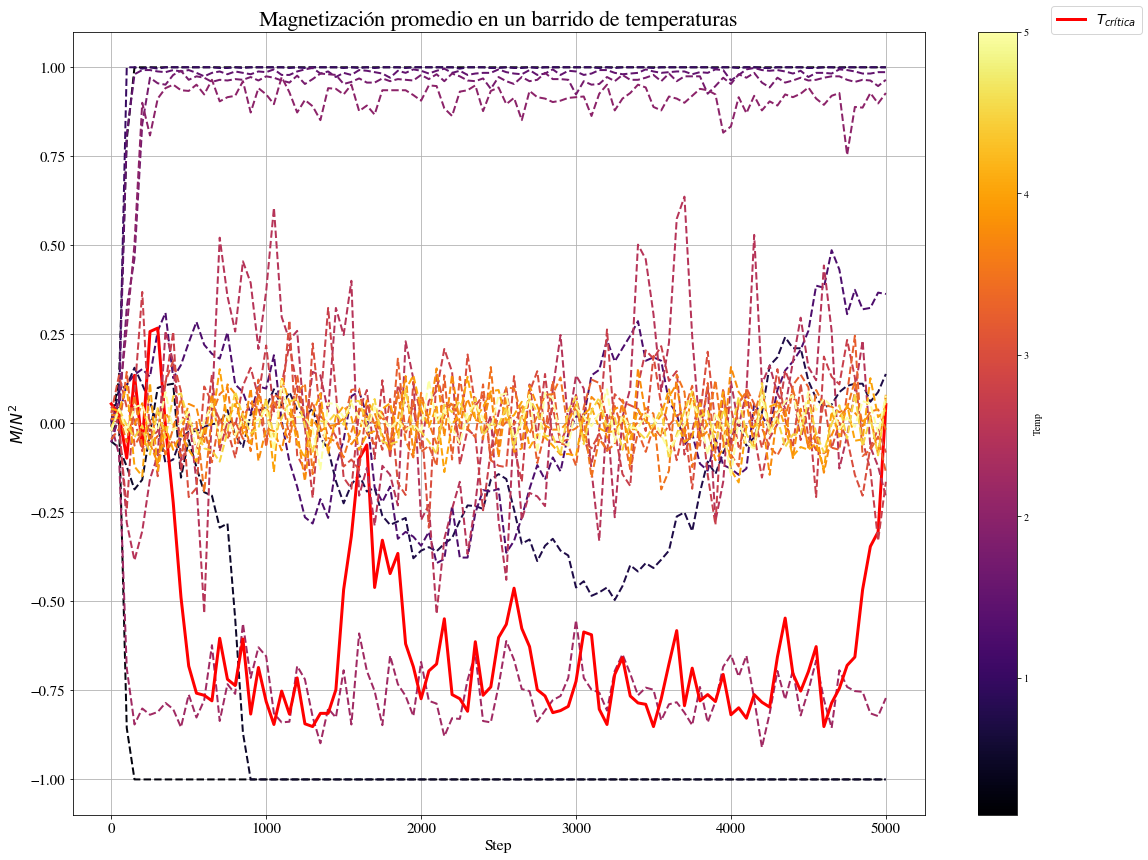

In [105]:
n_lines = len(Temps)
c = np.arange(1,n_lines+1)

norm = mpl.colors.Normalize(vmin=Temps[0],vmax=Temps[-1])
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.inferno)
cmap.set_array([])
fig, ax = plt.subplots()

fig.set_size_inches((16,12))

for i in range(len(Temps)):
    if i!=10: 
        ax.plot(ticks1, Runs[i][1],'--',linewidth=2,c=cmap.to_rgba(Temps[i]))
    else:
        ax.plot(ticks1, Runs[i][1],linewidth=3, c='red',label="$T_{crítica}$")
fig.colorbar(cmap, ticks=c,label="Temp")
fig.legend(fontsize=14)
plt.ylabel('$M/N^2$', size=16)
plt.xlabel('Step', size=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Magnetización promedio en un barrido de temperaturas",size=22)
plt.tight_layout()
plt.savefig("plots/BarridoT.png")
plt.show()

3) Repeat the run for the 32x32 grid, at T=1 and T=4 using free boundary conditions.
    
 1. Before you simulate this case: Do you expect <M> to be lower or higher? Why?
    
 2. After simulating, what differences do you see when comparing to the PBC case?

In [119]:
Ising1.restart()
Ising4.restart()

In [123]:
expe_T1 = Ising_Experiment(Ising1,1,Nsteps=5000,data_step=50)
expe_T4 = Ising_Experiment(Ising4,4,Nsteps=5000,data_step=50)

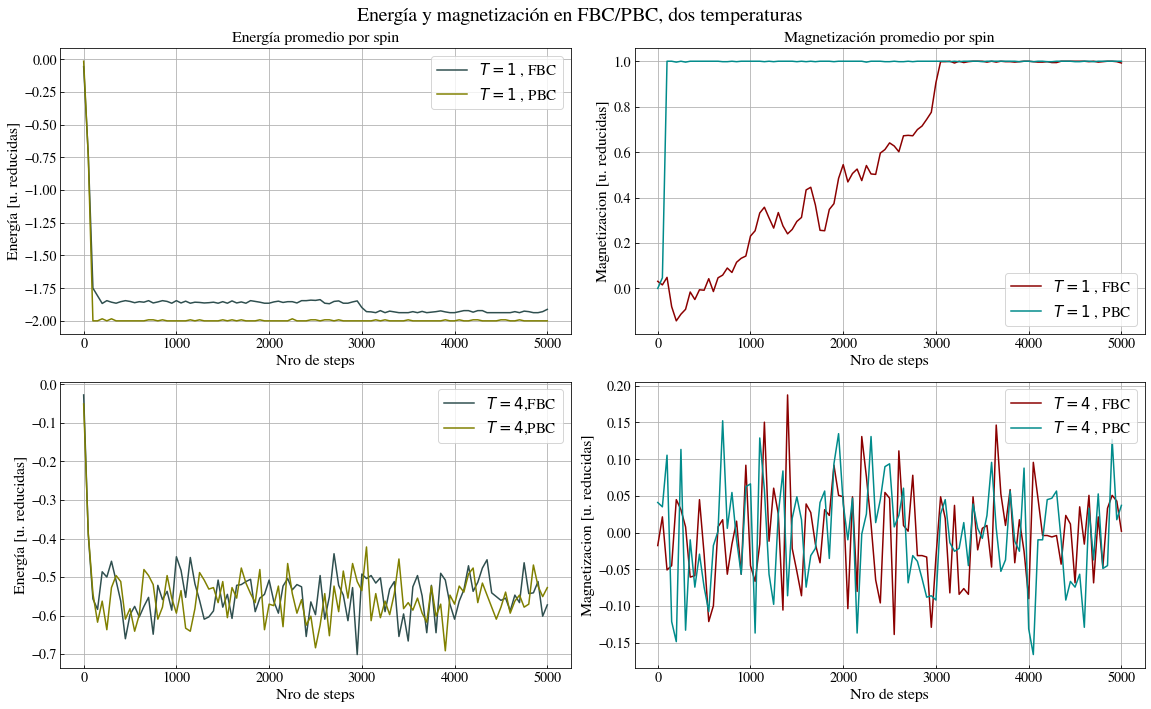

In [125]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches((16,10))

fig.suptitle("Energía y magnetización en FBC/PBC, dos temperaturas",size=20)

axs[0][0].plot(ticks1,expe_T1[0],label="$T=1$ , FBC",color='darkslategrey')
axs[0][0].plot(ticks1,Runs[4][0],label="$T=1$ , PBC",color='olive')
axs[0][0].set_title("Energía promedio por spin",size=16)
axs[0][0].set_ylabel("Energía [u. reducidas]",size=16)
axs[1][0].plot(ticks1,expe_T4[0],label="$T=4$,FBC",color='darkslategrey')
axs[1][0].plot(ticks1,Runs[17][0],label="$T=4$,PBC",color='olive')
axs[1][0].set_ylabel("Energía [u. reducidas]",size=16)

axs[0][1].plot(ticks1,expe_T1[1],label="$T=1$ , FBC",color='darkred')
axs[0][1].plot(ticks1,Runs[4][1],label="$T=1$ , PBC",color='darkcyan')
axs[0][1].set_ylabel("Magnetizacion [u. reducidas]",size=16)
axs[0][1].set_title("Magnetización promedio por spin",size=16)
axs[1][1].plot(ticks1,expe_T4[1],label="$T=4$ , FBC",color='darkred')
axs[1][1].plot(ticks1,Runs[17][1],label="$T=4$ , PBC",color='darkcyan')
axs[1][1].set_ylabel("Magnetizacion [u. reducidas]",size=16)

for ax in axs:
    for plot in ax:
        plot.grid()
        plot.legend(fontsize=15)
        plot.tick_params(axis='both',which='both',direction='in', labelsize=14)
        plot.set_xlabel("Nro de steps",size=16)

fig.tight_layout()
plt.savefig("plots/2T_FBC.png")

4) Run square grids with 5 different sizes, for instance size 4, 8, 16, 32, 64. Calculate average
energy and average magnetization versus step, for T=1 and T=4.
    
    (a) How many MC steps are required to reach a steady state for each system size?
    
    (b) Plot <E> and <M> versus system size. What size do you think is needed to simulate a “bulk”
system?
    
    (c) Could you observe any power-law scaling of the magnetization with system size?

In [3]:
Runs1 = [Ising(2**(i+2)) for i in range(5)]
Runs4 = [Ising(2**(i+2)) for i in range(5)]

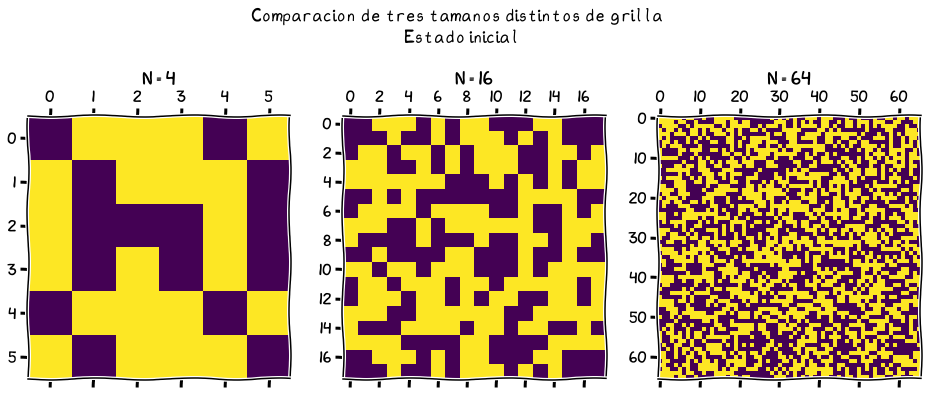

In [149]:
with plt.xkcd():
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches((16,7))
    fig.suptitle("Comparacion de tres tamanos distintos de grilla \n Estado inicial")
    axs[0].matshow(Runs1[0].grid)
    axs[0].set_title("N = 4")
    axs[1].matshow(Runs1[2].grid)
    axs[1].set_title("N = 16")
    axs[2].matshow(Runs1[4].grid)
    axs[2].set_title("N = 64")
    plt.savefig("3grids_ej4.png")

In [ ]:
results1 = []
results4 = []
for i in range(len(Runs1)):
    results1.append(Ising_Experiment(Runs1[i],1))
    results4.append(Ising_Experiment(Runs4[i],4))

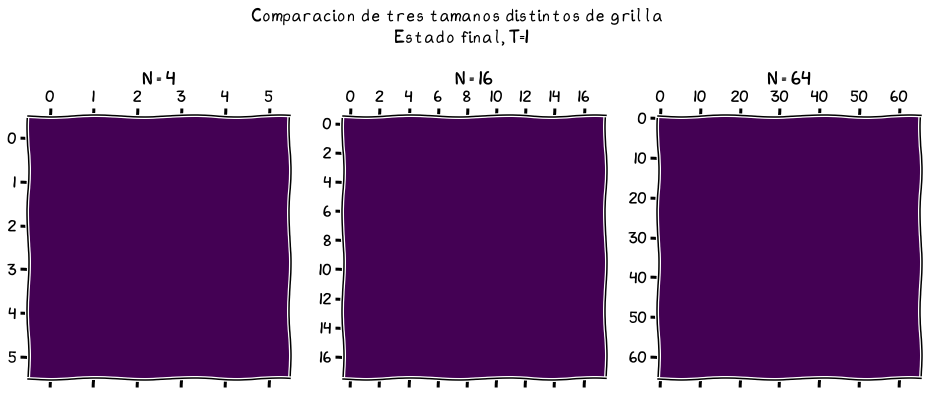

In [156]:
with plt.xkcd():
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches((16,7))
    fig.suptitle("Comparacion de tres tamanos distintos de grilla \n Estado final, T=1")
    axs[0].matshow(Runs1[0].grid)
    axs[0].set_title("N = 4")
    axs[1].matshow(Runs1[2].grid)
    axs[1].set_title("N = 16")
    axs[2].matshow(Runs1[4].grid)
    axs[2].set_title("N = 64")
    plt.savefig("plots/3gridsT1_ej4_final.png")

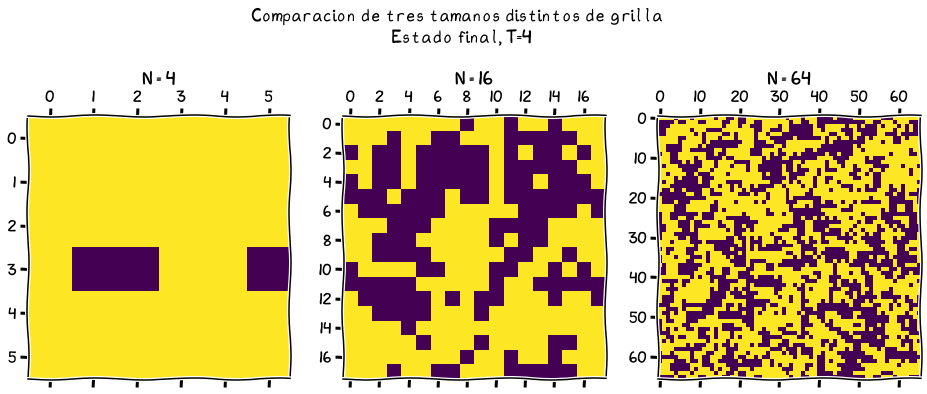

In [158]:
with plt.xkcd():
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches((16,7))
    fig.suptitle("Comparacion de tres tamanos distintos de grilla \n Estado final, T=4")
    axs[0].matshow(Runs4[0].grid)
    axs[0].set_title("N = 4")
    axs[1].matshow(Runs4[2].grid)
    axs[1].set_title("N = 16")
    axs[2].matshow(Runs4[4].grid)
    axs[2].set_title("N = 64")
    plt.savefig("plots/3gridsT4_ej4_final.png")

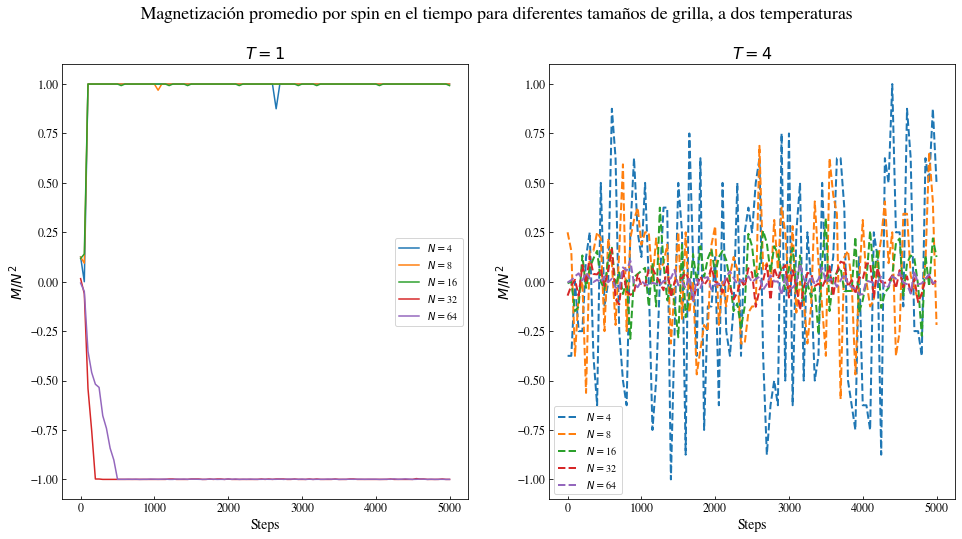

In [184]:
fig,axs = plt.subplots(1,2)
fig.set_size_inches((16,8))
fig.suptitle(" Magnetización promedio por spin en el tiempo para diferentes tamaños de grilla, a dos temperaturas",size=18)

for i in range(len(results1)):
    axs[0].plot(ticks1,results1[i][1],label="$N = $"+str(2**(i+2)))
    axs[0].legend()
    
    axs[1].plot(ticks1,results4[i][1],'--',linewidth=2,label="$N = $"+str(2**(i+2)))
    axs[1].legend()
axs[0].set_title("$T = 1$",size=16)
axs[1].set_title("$T = 4$",size=16)

for ax in axs:
    ax.set_xlabel("Steps",size=14)
    ax.set_ylabel("$M/N^2$",size=14)
    ax.tick_params(axis='both',which='both',direction='in', labelsize=12)
    
plt.savefig("plots/5sizes_T1T4_M.png")

In [201]:
Mstd_T1 = [[[],[]],
          [[],[]]]
Mstd_T4 = [[[],[]],
          [[],[]]]

In [202]:
for i in range(len(results1)):
    #Energía
    Mstd_T1[0][0].append(np.mean(results1[i][0]))
    Mstd_T1[0][1].append(np.std(results1[i][0]))
    Mstd_T4[0][0].append(np.mean(results4[i][0]))
    Mstd_T4[0][1].append(np.std(results4[i][0]))
    #Magnetización
    Mstd_T1[1][0].append(np.mean(results1[i][1]))
    Mstd_T1[1][1].append(np.std(results1[i][1]))
    Mstd_T4[1][0].append(np.mean(results4[i][1]))
    Mstd_T4[1][1].append(np.std(results4[i][1]))

In [203]:
gridsize=[4,8,16,32,64]

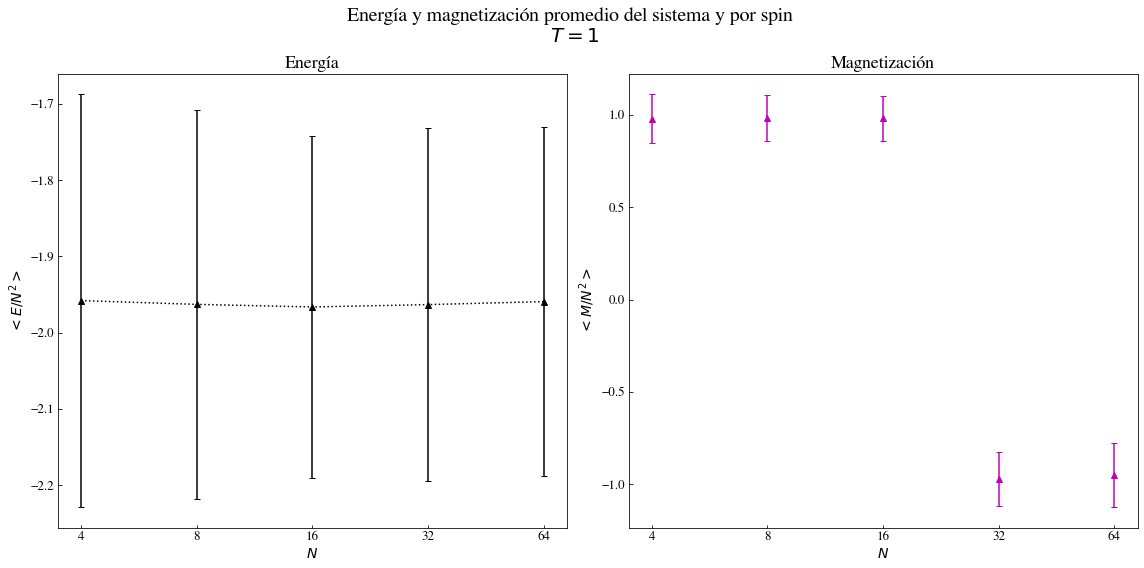

In [341]:
fig,axs = plt.subplots(1,2)
fig.set_size_inches((16,8))
fig.suptitle("Energía y magnetización promedio del sistema y por spin \n $T=1$",size=20)


axs[0].set_title("Energía",size=18)
axs[0].errorbar([0,1,2,3,4],Mstd_T1[0][0],Mstd_T1[0][1],fmt='^k:',capsize=3, capthick=1)
axs[0].set_xticks([0,1,2,3,4])
axs[0].set_xticklabels(['4','8','16','32','64'])
axs[0].set_ylabel("$<E/N^2>$",size=14)

axs[1].set_title("Magnetización",size=18)
axs[1].errorbar([0,1,2,3,4],Mstd_T1[1][0],Mstd_T1[1][1],fmt='^m',capsize=3, capthick=1)
axs[1].set_xticks([0,1,2,3,4])
axs[1].set_xticklabels(['4','8','16','32','64'])
axs[1].set_ylabel("$<M/N^2>$",size=14)

for ax in axs:
    ax.set_xlabel("$N$",size=14)
    ax.tick_params(axis='both',which='both',direction='in', labelsize=13)
plt.tight_layout()
plt.savefig("plots/EM_N_T1.png")

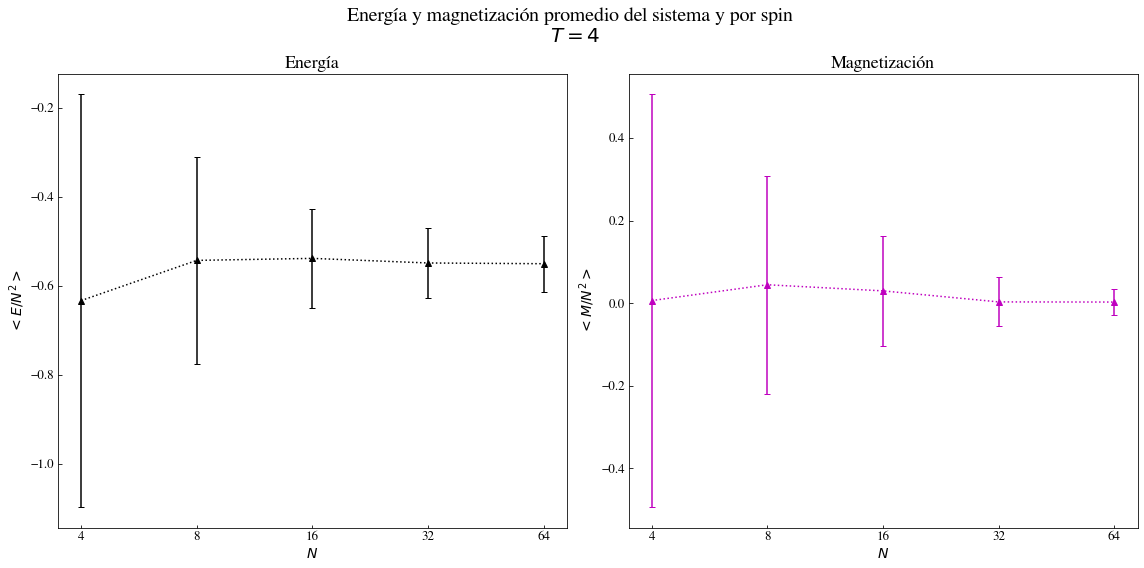

In [340]:
fig,axs = plt.subplots(1,2)
fig.set_size_inches((16,8))
fig.suptitle("Energía y magnetización promedio del sistema y por spin \n $T=4$",size=20)

axs[0].set_title("Energía",size=18)
axs[0].errorbar([0,1,2,3,4],Mstd_T4[0][0],Mstd_T4[0][1],fmt='^k:',capsize=3, capthick=1)
axs[0].set_xticks([0,1,2,3,4])
axs[0].set_xticklabels(['4','8','16','32','64'])
axs[0].set_ylabel("$<E/N^2>$",size=14)

axs[1].set_title("Magnetización",size=18)
axs[1].errorbar([0,1,2,3,4],Mstd_T4[1][0],Mstd_T4[1][1],fmt='^m:',capsize=3, capthick=1)
axs[1].set_xticks([0,1,2,3,4])
axs[1].set_xticklabels(['4','8','16','32','64'])
axs[1].set_ylabel("$<M/N^2>$",size=14)

for ax in axs:
    ax.set_xlabel("$N$",size=14)
    ax.tick_params(axis='both',which='both',direction='in', labelsize=13)
plt.tight_layout()
plt.savefig("plots/EM_N_T4.png")

### Gráfica que puede estar buena para encontrar el punto crítico

In [276]:
test = Ising(32)

T = np.linspace(1.0,3.0,20)

In [319]:
M_promedio = []
M_desv = []

In [ ]:
M = []

In [279]:
for t in T:
    m = []
    for i in range(50):
        m.append(np.mean(Ising_Experiment(test,t,Nsteps=2500,data_step=2)[1]))
        test.restart()
    M.append(m)
    print("Simulado 50 veces a T=",t)

print("Listo!")

Simulado 50 veces a T= 1.0
Simulado 50 veces a T= 1.1052631578947367
Simulado 50 veces a T= 1.2105263157894737
Simulado 50 veces a T= 1.3157894736842106
Simulado 50 veces a T= 1.4210526315789473
Simulado 50 veces a T= 1.526315789473684
Simulado 50 veces a T= 1.631578947368421
Simulado 50 veces a T= 1.736842105263158
Simulado 50 veces a T= 1.8421052631578947
Simulado 50 veces a T= 1.9473684210526314
Simulado 50 veces a T= 2.052631578947368
Simulado 50 veces a T= 2.1578947368421053
Simulado 50 veces a T= 2.263157894736842
Simulado 50 veces a T= 2.3684210526315788
Simulado 50 veces a T= 2.473684210526316
Simulado 50 veces a T= 2.5789473684210527
Simulado 50 veces a T= 2.6842105263157894
Simulado 50 veces a T= 2.789473684210526
Simulado 50 veces a T= 2.894736842105263
Simulado 50 veces a T= 3.0
Listo!


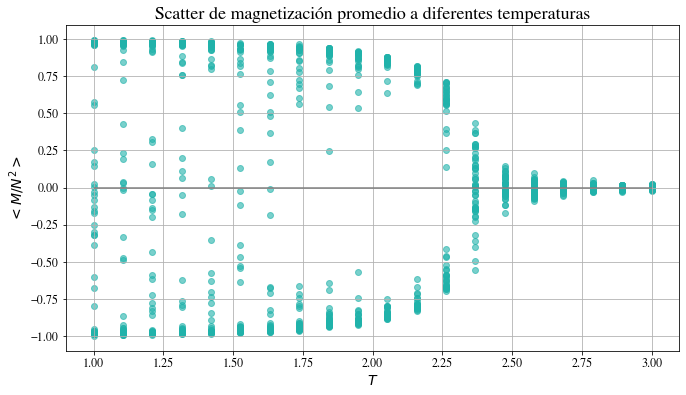

In [316]:
plt.figure(figsize=(11,6))
for i in range(len(T)):
    plt.scatter([T[i]]*50,M[i],color='lightseagreen',alpha=0.6)
plt.hlines(0,1,3,color='grey')
plt.xlabel("$T$",size=14);plt.ylabel("$<M/N^2>$",size=14)
plt.title("Scatter de magnetización promedio a diferentes temperaturas",size=18)
plt.xticks(size=12);plt.yticks(size=12)
plt.grid()
plt.savefig("plots/scatterM.png")

**Precioso**

Ahora lo que vamos a plotear es el valor promedio del módulo de la magnetización para cada conjunto de corridas a una temperatura dada.

In [321]:
for i in range(len(M)):
    M_promedio.append(np.mean(np.abs(M[i])))
    M_desv.append(np.std(np.abs(M[i])))

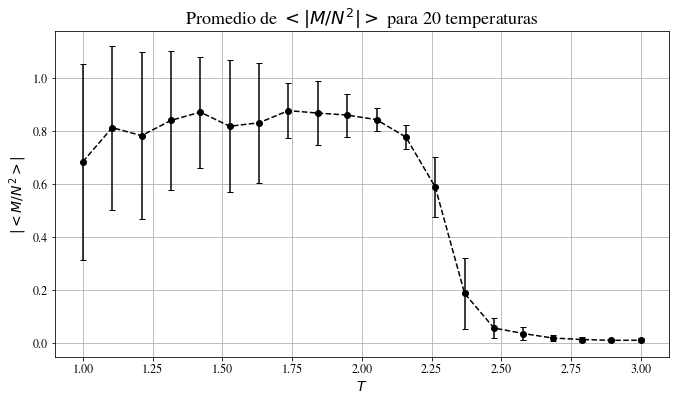

In [371]:
plt.figure(figsize=(11,6))
plt.title("Promedio de $<|M/N^2|>$ para 20 temperaturas",size=18)
plt.xlabel("$T$",size=14);plt.ylabel("$|<M/N^2>|$",size=14)
plt.xticks(size=12);plt.yticks(size=12)
plt.grid()
plt.errorbar(T,M_promedio,yerr=M_desv,fmt='ok--',capsize=3, capthick=1)
plt.savefig("plots/scattermodM_prom.png")

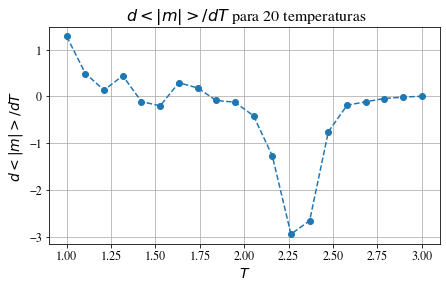

In [376]:
plt.figure(figsize=(7,4))
plt.title(" $d<|m|>/dT$ para 20 temperaturas",size=16)
plt.xlabel("$T$",size=14);plt.ylabel("$d<|m|>/dT$",size=14)
plt.xticks(size=12);plt.yticks(size=12)
plt.grid()
plt.plot(T,np.gradient(M_promedio,0.1),'o--')
plt.savefig("dm_dT_Tcritica.png")